In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numdifftools as nd

H-matrix cond.number:  24.00568678829101 sp solution:  0.08178055950899162 obtained f 0.08178253467793736


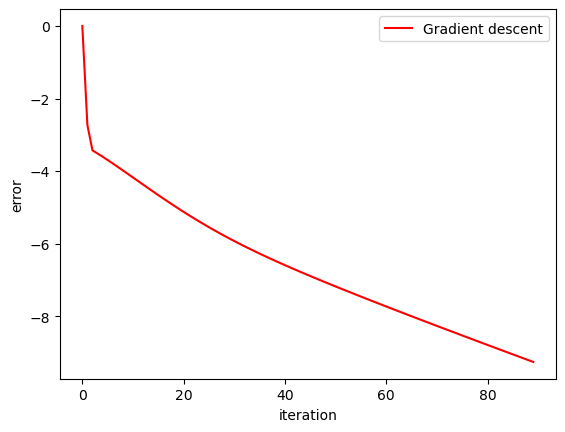

In [2]:
r = np.random.RandomState(42)
d = 10
A = r.random((d,d))
A = (A.T)@A + np.identity(d)
b = r.random((d,))
c = r.random()

def f(x):
    return 1/2*A@x@x - b@x + c + (np.sin(b@x))**3

L = np.linalg.norm(A, 2)

x = np.zeros(d)

res_sp = minimize(f, x)
sp_min = res_sp.fun

h = 1/L

err = 1

history = [err]

while err > 0.0001:
    x_old = x
    grad = nd.Gradient(f)(x)
    x = x - h*grad
    err = np.linalg.norm(x - x_old, 2)
    history.append(err)

plt.plot(np.arange(0,len(history),1), np.log(history), color = 'red', label ='Gradient descent')
plt.ylabel('error')
plt.xlabel('iteration')
plt.legend()
print('H-matrix cond.number: ', L, 'sp solution: ', sp_min, 'obtained f',f(x))
plt.show()